In [1]:
%load_ext line_profiler
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import time
import pickle

from collections import Counter, defaultdict, OrderedDict, namedtuple
import random
import copy
import bisect
import heapq

import multiprocessing as mp
from multiprocessing import Pool

import warnings
warnings.filterwarnings('error')

In [2]:
records=pd.read_csv('data/ydata-fp-td-clicks-v2_0.20111002', 
                    sep=' ',
                    names=['timestamp','id','clicked'],
                    usecols=[0,1,2],)

In [42]:
records.head()

,timestamp,id,clicked
0,1317513291,id-560620,0
1,1317513291,id-565648,0
2,1317513291,id-563115,0
3,1317513292,id-552077,0
4,1317513292,id-564335,0


In [51]:
records.timestamp.value_counts().values

array([53, 51, 49, ...,  1,  1,  1])

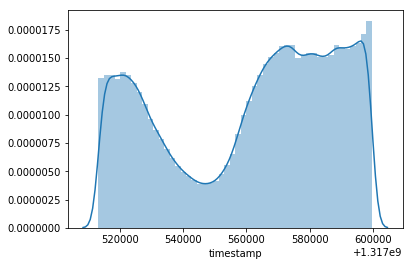

In [4]:
sns.distplot(records.timestamp)

In [24]:
with open('save/lifespans','rb') as f:
    lifespans = pickle.load(f)

In [52]:
lifespans

{'id-552077': [1317513291, 1317515399],
 'id-555224': [1317513291, 1317588299],
 'id-555528': [1317513291, 1317587099],
 'id-559744': [1317513291, 1317515699],
 'id-559855': [1317513291, 1317587099],
 'id-560290': [1317513291, 1317587099],
 'id-560518': [1317513291, 1317578399],
 'id-560620': [1317513291, 1317521099],
 'id-563115': [1317513291, 1317581999],
 'id-563582': [1317513291, 1317583799],
 'id-563643': [1317513291, 1317636599],
 'id-563787': [1317513291, 1317515699],
 'id-563846': [1317513291, 1317636599],
 'id-563938': [1317513291, 1317519299],
 'id-564335': [1317513291, 1317571199],
 'id-564418': [1317513291, 1317636599],
 'id-564604': [1317513291, 1317520799],
 'id-565364': [1317513291, 1317535499],
 'id-565479': [1317513291, 1317583499],
 'id-565515': [1317513291, 1317587399],
 'id-565533': [1317513291, 1317583499],
 'id-565561': [1317513291, 1317549899],
 'id-565589': [1317513291, 1317577499],
 'id-565648': [1317513291, 1317586799],
 'id-565747': [1317513291, 1317570299],


In [85]:
l=[]
global_max=0
for i in lifespans.items():
    start,stop=i[1]
    while l and l[0][0]<start:
        heapq.heappop(l)
    if len(l)>=10:
        min_stop=l[0][0]
        max_start=max(l, key=lambda i:i[1])[1]
        if min_stop-max_start>=3600*12:
            print(len(l), min_stop, max_start, min_stop-max_start)
    heapq.heappush(l,(stop,start)) # min stop (earliest expiring)
    global_max=max(global_max, len(l))
global_max

24 1317830699 1317783600 47099
20 1318789799 1318742700 47099


51

In [71]:
3600*24

86400

In [43]:
len(lifespans)

652

24 1317830699 1317783600 47099
20 1318789799 1318742700 47099


51

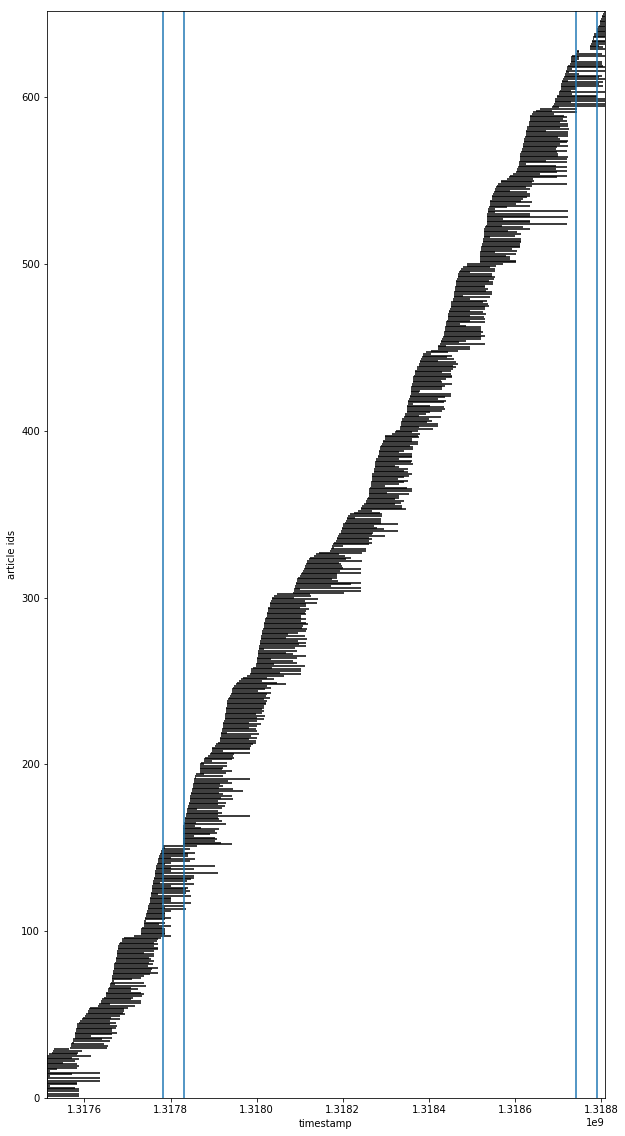

In [102]:
plt.figure(figsize=(10,20))
y=0
for start,stop in lifespans.values():
    plt.hlines(y, xmin=start, xmax=stop)
    #plt.scatter(np.arange(start,stop,1000),[y for j in range(start,stop,1000)], marker='.')
    y+=1
plt.xlabel('timestamp')
plt.ylabel('article ids')
plt.xlim(1317513291, 1318809293)
plt.ylim(0,652)

l=[]
global_max=0
for i in lifespans.items():
    start,stop=i[1]
    while l and l[0][0]<start:
        heapq.heappop(l)
    if len(l)>=20:
        min_stop=l[0][0]
        max_start=max(l, key=lambda i:i[1])[1]
        if min_stop-max_start>=3600*12:
            plt.axvline(min_stop)
            plt.axvline(max_start)
            print(len(l), min_stop, max_start, min_stop-max_start)
    heapq.heappush(l,(stop,start)) # min stop (earliest expiring)
    global_max=max(global_max, len(l))
global_max